In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# #check file paths for data paths 
# from os import listdir

# #list files/directories in current directory
# for file in listdir("./"):
#     print(file)
    
train_path = "./data/train.csv"
test_path = "./data/test.csv"
test_labels_path = "./data/test_labels.csv"

#load data with pandas and return dataframes 
def load_data(train_path, test_path, test_labels_path):
    train = pd.read_csv(train_path)
    print(train[0:10])
    test = pd.read_csv(test_path)
    test_labels = pd.read_csv(test_labels_path)
#     cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']
    return train, test, test_labels, cols_target


train, test, test_labels, cols = load_data(train_path, test_path, test_labels_path)

In [53]:
print(train[0:10])

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...      0   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...      0   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...      0   
9  00040093b2687caa  alignment on this subject and which are contra...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0          

Train data length:  159571
Test data length:  153164

Percentage of unlabelled:  89.83211235124176
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


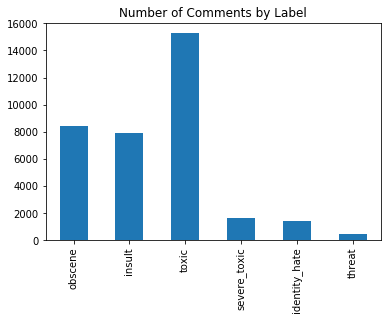

In [28]:
#summarize data
def summary():
    labels = train.iloc[:,2:]
    zero = np.where(np.sum(labels,axis=1)==0)
    # Find the unlabelled percentage
    unlabelled = train[(train['toxic']!=1) & (train['severe_toxic']!=1) &\
                                 (train['obscene']!=1) & (train['threat']!=1) &\
                                 (train['insult']!=1) & (train['identity_hate']!=1)]
    print("Train data length: ", len(train))
    print("Test data length: ", len(test))
    print('\nPercentage of unlabelled: ', len(unlabelled)/len(train)*100)
    print(train[cols].sum())

    train[cols].sum().plot.bar(title ="Number of Comments by Label")

summary()

In [92]:
def get_data(): 
    #temporarily only use 500 
    test_comments = train.iloc[0:500,1]
    train_comments = test.iloc[0:500,1]
    
    #labels as numpy 
    labels = train.iloc[0:500,2:]
    labels['vector_label'] = labels.astype(str).values.sum(axis=1)
    train_labels = labels['vector_label']
    
#     labels as pd dataframes
#     toxic_train_labels = train.iloc[0:500,2:3]
#     severe_toxic_labels = train.iloc[0:500,3:4] 
#     obscene_labels = train.iloc[0:500,4:5] 
#     threat_labels = train.iloc[0:500,5:6] 
#     insult_labels = train.iloc[0:500,6:7] 
#     identity_hate_labels = train.iloc[0:500,7:8] 
    
#     return test_comments, train_comments, toxic_train_labels, severe_toxic_labels, obscene_labels, threat_labels, insult_labels, identity_hate_labels

    return test_comments, train_comments, train_labels
# test_comments, train_comments, toxic_train_labels, severe_toxic_labels, obscene_labels, threat_labels, insult_labels, identity_hate_labels = get_data()


test_comments, train_comments, train_labels = get_data()



(500,)


In [52]:
#vectorize inputs
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize():
    vectorizer = TfidfVectorizer(max_df=0.5, stop_words='english')
    features_train = vectorizer.fit_transform(test_comments)
    features_test = vectorizer.fit_transform(train_comments)
    train_vocab = vectorizer.get_feature_names()
#     print(train_vocab)
    return features_train, features_test, vectorizer

features_train, features_test, vectorizer = vectorize()
    

In [85]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(features_train, toxic_train_labels.values.ravel())
score_train = model.score(features_train, toxic_train_labels.values.ravel())

print(score_train)


0.902
